In [1]:
#Final Patient Simulation
import numpy as np

# Define the arrival rate for each blood type per year
arrival_rate = {'A': 0.4 * 4200 /365, 'O': 0.45 * 4200/ 365, 'B': 0.11 * 4200/ 365, 'AB': 0.04 * 4200/ 365}

# Define the Weibull distribution parameters
a, b = 8, 2

# Define the blood type distribution
blood_type_dist = {'O': 0.45, 'A': 0.40, 'B': 0.11, 'AB': 0.04}

# Define the patient class
class Patient:
    
    # Initialize a counter for patient IDs
    id_counter = 0
    
    def __init__(self):
        
        # Increment the patient ID counter
        Patient.id_counter += 1
        self.id = Patient.id_counter
        
        self.blood_type = np.random.choice(list(blood_type_dist.keys()), p=list(blood_type_dist.values()))
        self.health = np.random.weibull(a) * b
        self.days_on_dialysis = self.health * 365
        self.arrival_time = 0
        self.failure_time = 0
        self.k = 0  # Initialize the k variable to 0
        
        if self.blood_type == 'O':
            self.blood_type_compatible = ['O']
        elif self.blood_type == 'A':
            self.blood_type_compatible = ['O', 'A']
        elif self.blood_type == 'B':
            self.blood_type_compatible = ['O', 'B']
        elif self.blood_type == 'AB':
            self.blood_type_compatible = ['O', 'A', 'B', 'AB']

# Generate the patients
patients = []
for i in range(int(sum(arrival_rate.values())*2555)):
    blood_type = np.random.choice(list(blood_type_dist.keys()), p=list(blood_type_dist.values()))
    patient = Patient()
    patient.blood_type = blood_type
    patients.append(patient)

    # Record arrival time
    rate = arrival_rate[blood_type]
    patient.arrival_time = i / rate
    patient.failure_time = patient.arrival_time + patient.days_on_dialysis
    
# Sort the patients by arrival time
patients = sorted(patients, key=lambda x: x.arrival_time)

# Scale the Weibull values
weibull_values = [patient.health for patient in patients]
min_health = min(weibull_values)
max_health = max(weibull_values)
range_health = max_health - min_health

# Calculate the k variable for each patient
for patient in patients:
    patient.k = (patient.health - min_health) / range_health

# Print some example patients
for i in range(30):
    patient = patients[i]
    print(f"Patient {i}: ID={patient.id}, Blood Type={patient.blood_type}, Health={patient.health:.2f}, Days Left={patient.days_on_dialysis:.2f}, K={patient.k:.2f}, Arrival Time={patient.arrival_time:.2f}, Failure Time={patient.failure_time:.2f}")


Patient 0: ID=1, Blood Type=O, Health=1.75, Days Left=639.91, K=0.54, Arrival Time=0.00, Failure Time=639.91
Patient 1: ID=2, Blood Type=A, Health=2.29, Days Left=835.65, K=0.81, Arrival Time=0.22, Failure Time=835.87
Patient 2: ID=3, Blood Type=O, Health=1.78, Days Left=650.53, K=0.56, Arrival Time=0.39, Failure Time=650.91
Patient 3: ID=4, Blood Type=O, Health=1.81, Days Left=660.26, K=0.57, Arrival Time=0.58, Failure Time=660.84
Patient 4: ID=5, Blood Type=O, Health=1.39, Days Left=505.61, K=0.36, Arrival Time=0.77, Failure Time=506.39
Patient 5: ID=6, Blood Type=O, Health=1.96, Days Left=716.83, K=0.65, Arrival Time=0.97, Failure Time=717.80
Patient 6: ID=7, Blood Type=O, Health=1.63, Days Left=594.35, K=0.48, Arrival Time=1.16, Failure Time=595.51
Patient 7: ID=8, Blood Type=O, Health=1.81, Days Left=659.31, K=0.57, Arrival Time=1.35, Failure Time=660.66
Patient 8: ID=9, Blood Type=O, Health=1.71, Days Left=622.46, K=0.52, Arrival Time=1.54, Failure Time=624.01
Patient 9: ID=11, B

In [2]:
# Kidney simulation for 7 years
import numpy as np

# Define the arrival rate for each blood type per day
arrival_rate = {'A': 0.4 * 892 / 365, 'O': 0.45 * 892 / 365, 'B': 0.11 * 892 / 365, 'AB': 0.04 * 892 / 365}

# Define the uniform distribution parameters
a, b = 0, 1

# Define the blood type distribution
blood_type_dist = {'O': 0.45, 'A': 0.40, 'B': 0.11, 'AB': 0.04}

# Define the kidney class
class Kidney:
    
     # Initialize a counter for kidney IDs
    id_counter = 0
    
    def __init__(self):
         
        # Increment the kidney ID counter
        Kidney.id_counter += 1
        self.id = Kidney.id_counter
        
        self.blood_type = np.random.choice(list(blood_type_dist.keys()), p=list(blood_type_dist.values()))
        self.quality = np.random.uniform(a,b)
        self.arrival_time = 0
        self.CIT = 0
        
# Generate the kidneys
kidneys = []
for i in range(int(sum(arrival_rate.values())*2555)):
    blood_type = np.random.choice(list(blood_type_dist.keys()), p=list(blood_type_dist.values()))
    kidney = Kidney()
    kidney.blood_type = blood_type
    kidneys.append(kidney)
    
    # Record arrival time
    rate = arrival_rate[blood_type]
    kidney.arrival_time = i / rate

# Sort the kidneys by arrival time
kidneys = sorted(kidneys, key=lambda k: k.arrival_time)

# Print some example kidneys
for i in range(30):
    kidney = kidneys[i]
    print(f"Kidney {i}: ID={kidney.id}, Blood Type={kidney.blood_type}, Quality={kidney.quality:.2f}, CIT={kidney.CIT:.2f}, Arrival Time={kidney.arrival_time:.2f}")


Kidney 0: ID=1, Blood Type=O, Quality=0.63, CIT=0.00, Arrival Time=0.00
Kidney 1: ID=2, Blood Type=O, Quality=0.33, CIT=0.00, Arrival Time=0.91
Kidney 2: ID=3, Blood Type=A, Quality=0.35, CIT=0.00, Arrival Time=2.05
Kidney 3: ID=4, Blood Type=O, Quality=0.44, CIT=0.00, Arrival Time=2.73
Kidney 4: ID=5, Blood Type=O, Quality=0.51, CIT=0.00, Arrival Time=3.64
Kidney 5: ID=6, Blood Type=O, Quality=0.46, CIT=0.00, Arrival Time=4.55
Kidney 6: ID=7, Blood Type=O, Quality=0.66, CIT=0.00, Arrival Time=5.46
Kidney 7: ID=9, Blood Type=O, Quality=0.03, CIT=0.00, Arrival Time=7.27
Kidney 8: ID=10, Blood Type=O, Quality=0.10, CIT=0.00, Arrival Time=8.18
Kidney 9: ID=11, Blood Type=O, Quality=0.43, CIT=0.00, Arrival Time=9.09
Kidney 10: ID=12, Blood Type=O, Quality=0.87, CIT=0.00, Arrival Time=10.00
Kidney 11: ID=14, Blood Type=O, Quality=0.44, CIT=0.00, Arrival Time=11.82
Kidney 12: ID=15, Blood Type=A, Quality=0.14, CIT=0.00, Arrival Time=14.32
Kidney 13: ID=16, Blood Type=A, Quality=0.22, CIT=0.0

In [3]:
# Initialize empty lists for matches and unpaired kidneys/patients
matches = []
unpaired_kidneys = list(kidneys)  # Make a copy of the original list
unpaired_patients = list(patients)  # Make a copy of the original list
deceased_patients = []   #Make an empty list for deceased patients

# Define a function to check if a kidney and patient are a match
def is_match(kidney, patient):
    # Check if blood types match
    if kidney.blood_type not in patient.blood_type_compatible:
        return False
    # Check if kidney quality is above patient k value
    if kidney.quality < patient.k:
        return False
    # Check if kidney has arrived before patient
    #if kidney.arrival_time < patient.arrival_time:
    #    return False
    return True

# Loop over all kidneys and patients to find matches
for kidney in unpaired_kidneys:

    # Create a list of patients with an arrival time less than or equal to the first kidney
    group_patients = [patient for patient in unpaired_patients if patient.arrival_time <= kidney.arrival_time]

    # group_patients
    for patient in group_patients:
        if is_match(kidney, patient):
            matches.append((kidney, patient))
            unpaired_kidneys.remove(kidney)
            unpaired_patients.remove(patient)
            break
        
        if patient in unpaired_patients:
            patient.days_on_dialysis = patient.days_on_dialysis - (kidney.arrival_time - patient.arrival_time)
            patient.health = patient.days_on_dialysis / 365
            patient.k = (patient.health - min_health) / range_health
            
        if patient.days_on_dialysis <= 0:
            deceased_patients.append(patient)
            unpaired_patients.remove(patient)
    
    #if kidney in unpaired_kidneys:
    #    kidney.quality = 



#print("Matches:")
#for kidney, patient in matches:
    #print(f"Kidney {kidney.id} matched with Patient {patient.id}")

#print("Unpaired kidneys:")
#for kidney in unpaired_kidneys:
    #print(f"Kidney {kidney.id}")

#print("Unpaired patients:")
#for patient in unpaired_patients:
    #print(f"Patient {patient.id}")

print("Deceased patients:")
for patient in deceased_patients:
    print(f"Patient {patient.id}")

Deceased patients:
Patient 29
Patient 30
Patient 42
Patient 54
Patient 55
Patient 63
Patient 59
Patient 65
Patient 62
Patient 64
Patient 66
Patient 69
Patient 90
Patient 72
Patient 74
Patient 84
Patient 76
Patient 77
Patient 79
Patient 116
Patient 125
Patient 122
Patient 138
Patient 139
Patient 124
Patient 141
Patient 127
Patient 131
Patient 150
Patient 136
Patient 149
Patient 157
Patient 159
Patient 142
Patient 144
Patient 167
Patient 181
Patient 158
Patient 179
Patient 197
Patient 207
Patient 193
Patient 289
Patient 228
Patient 229
Patient 234
Patient 235
Patient 210
Patient 208
Patient 236
Patient 216
Patient 249
Patient 252
Patient 226
Patient 251
Patient 257
Patient 231
Patient 260
Patient 232
Patient 261
Patient 233
Patient 274
Patient 246
Patient 283
Patient 254
Patient 296
Patient 272
Patient 331
Patient 360
Patient 253
Patient 285
Patient 299
Patient 300
Patient 271
Patient 307
Patient 273
Patient 322
Patient 324
Patient 80
Patient 292
Patient 330
Patient 339
Patient 302
Patie

In [63]:
print(patients[-1])

print(deceased_patients[122].days_on_dialysis)

-647.266177565282


In [67]:
print(660.89-(63813.62-63792.44))

deceased_patients[-1].days_on_dialysis

639.7099999999997


-61906.087958975244

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


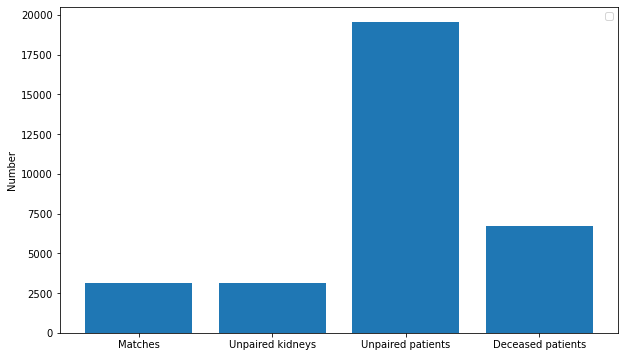

In [70]:
# Graph of matches, unpaired kidneys, unpaired patients and deceased patients
import pandas as pd
import matplotlib.pyplot as plt 
  
x = ['Matches', 'Unpaired kidneys', 'Unpaired patients','Deceased patients']
y = [len(matches), len(unpaired_kidneys), len(unpaired_patients), len(deceased_patients)]  
# plotting graph
X_axis = np.arange(len(x))

plt.figure(figsize=(10,6))
plt.bar(X_axis, y)
plt.xticks(X_axis, x)
#plt.xlabel("")
plt.ylabel("Number")
#plt.title("Number of Students in each group")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


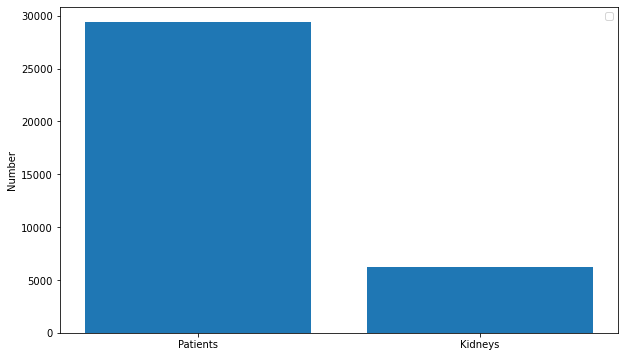

In [15]:
# number of patient and kidney arrivals over the 7 years
x = ['Patients', 'Kidneys']
y = [len(patients), len(kidneys)]  
# plotting graph

X_axis = np.arange(len(x))

plt.figure(figsize=(10,6))
plt.bar(X_axis, y)
plt.xticks(X_axis, x)
#plt.xlabel("")
plt.ylabel("Number")
#plt.title("Number of Students in each group")
plt.legend()
plt.show()